# Title: WES_237A_assignment3_report
# PID: A69028485
# Name: William Wei
# GitHub username: William Lien Chin Wei
# Email (registered with GitHub): williams19834812@gmail.com
# Video demonstration of your working code on Youtube: https://youtu.be/zU0ZwWNLB78

# Part A3.0: New kernel_module code

# Assignments Rubric checklist
(<font color='blue'>$\textbf{Done}$</font>) Report Submitted? <br>
(<font color='blue'>$\textbf{Done}$</font>) Video Uploaded? <br>
(<font color='blue'>$\textbf{Done}$</font>) Code Pushed to Github? <br>
(<font color='blue'>$\textbf{Done}$</font>) Does the video demonstration show correct execution? <br>
(<font color='blue'>$\textbf{Yes}$</font>) Is the submitted code correct? <br>
(<font color='blue'>$\textbf{Well-done}$</font>) How well does the report outlines the design of the code? <br>
(<font color='blue'>$\textbf{Well-done}$</font>)How well does the report describe the results? <br>
(<font color='blue'>$\textbf{Yes}$</font>) Does the Report detail the student's grasp on the goals/objectives of the assignment? <br>

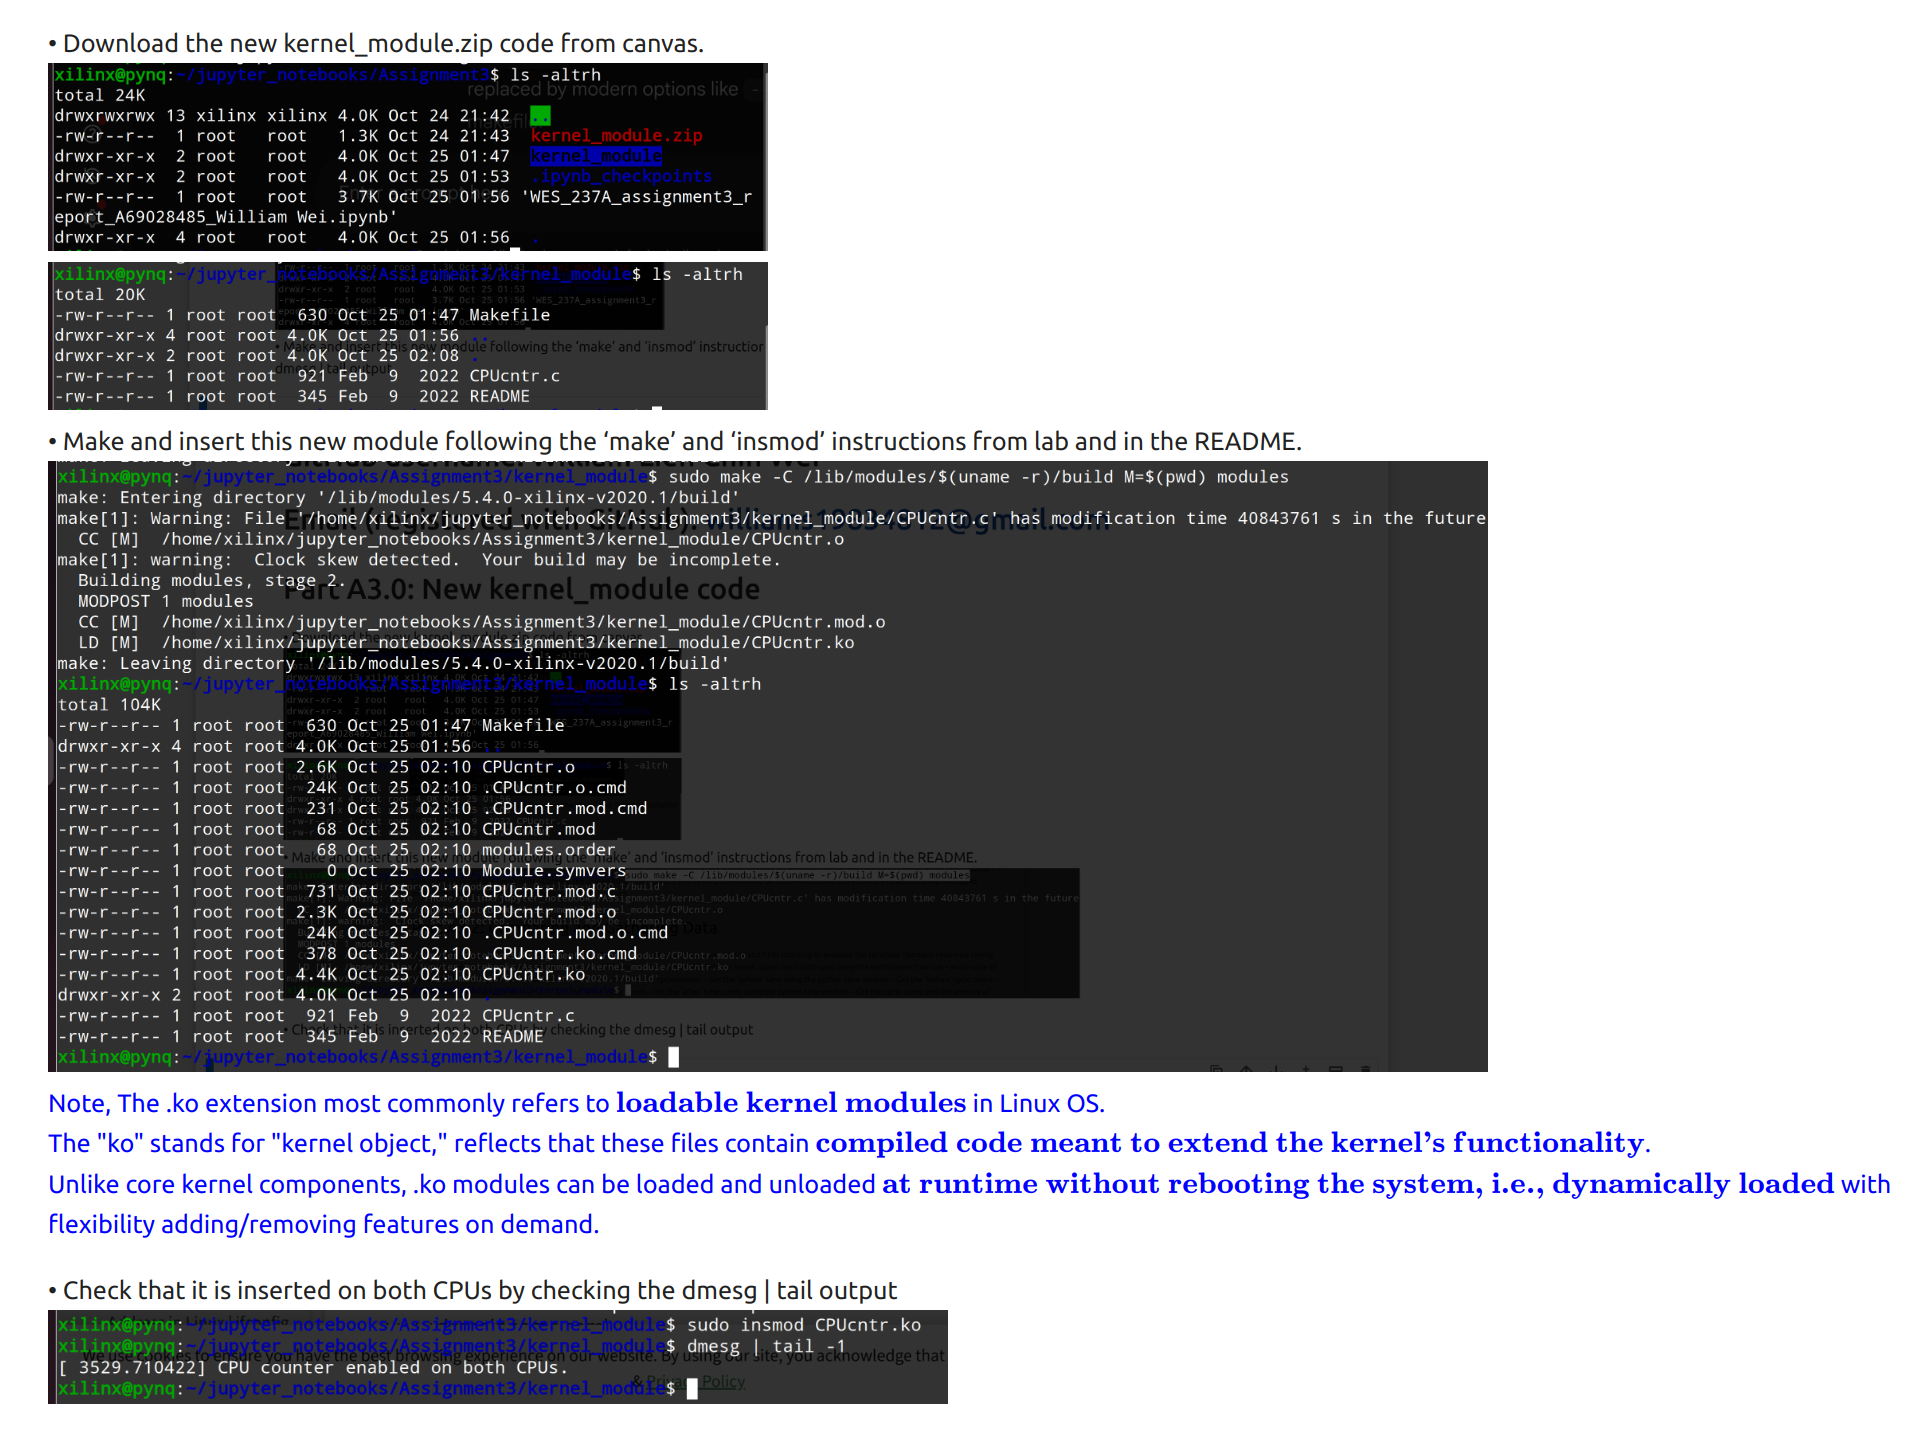

# Part A3.1: Access PMU (Performance Monitoring Unit) from python

• Create a shared library object with two fuctions by wrapping the cycletime.h into a new shared opticed library (see Lab2) <br>
– One function to initialize the PMU counters <br>
– One function to get the cycle count <br>

<font color='blue'> A $\textbf{getLibMessage}$ function is included in cycletime.h and cycletime.c. 
Function $\textbf{setInitCounters}$ works as a wrapper using function init_counters as shown below 
</font>

# cycletime.c
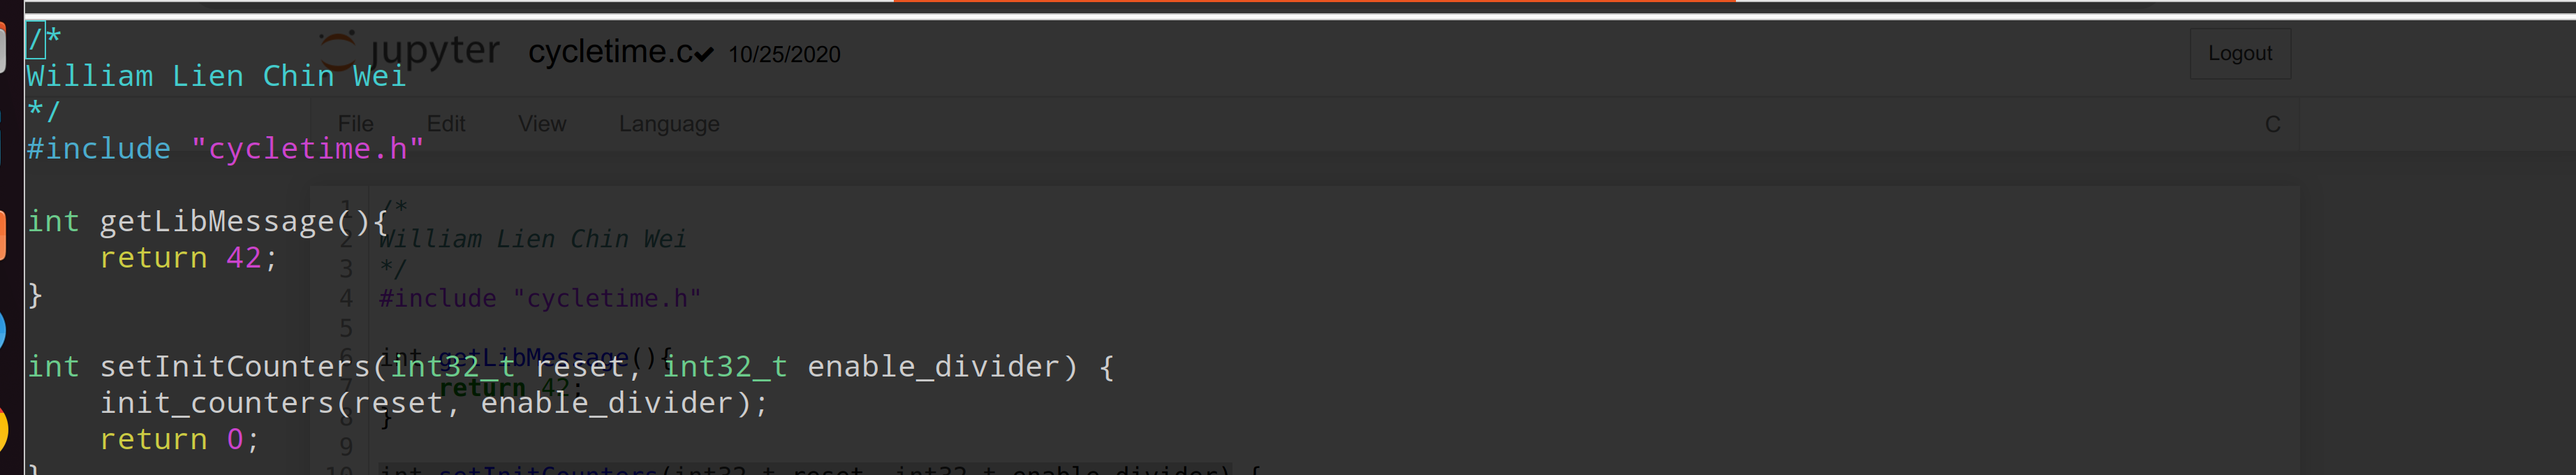

# cycletime.h
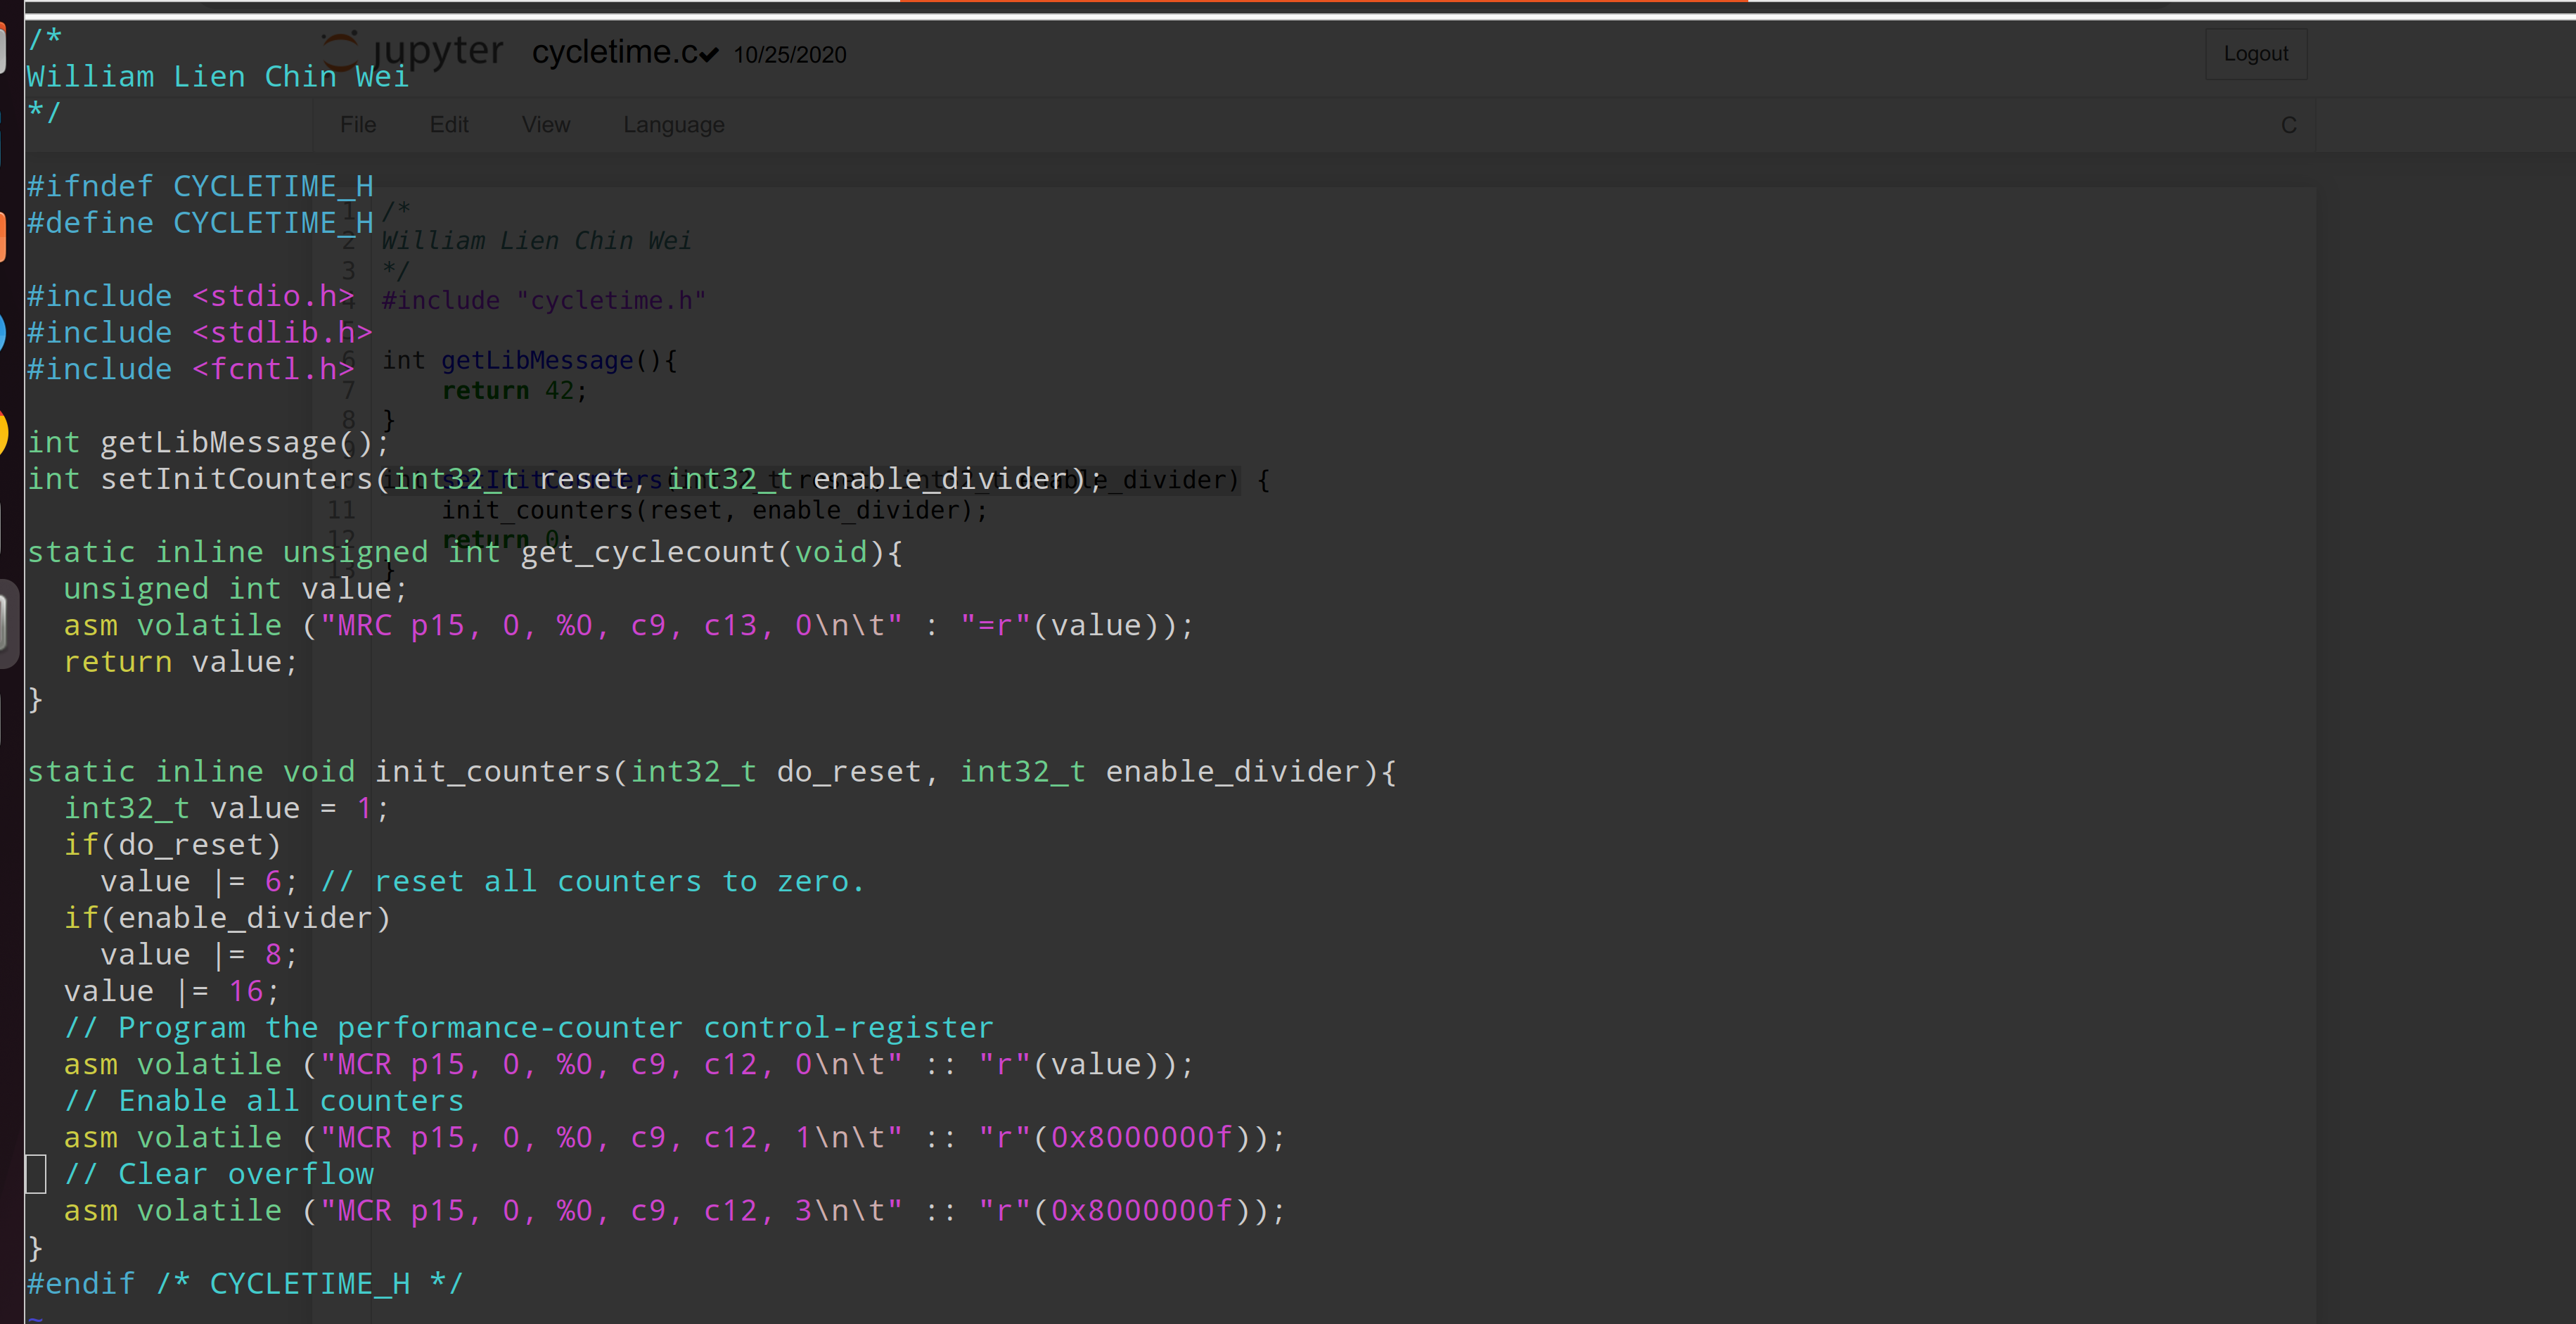

• Compile the shared library (see Lab2 if you’ve forgotten how to do this) <br>

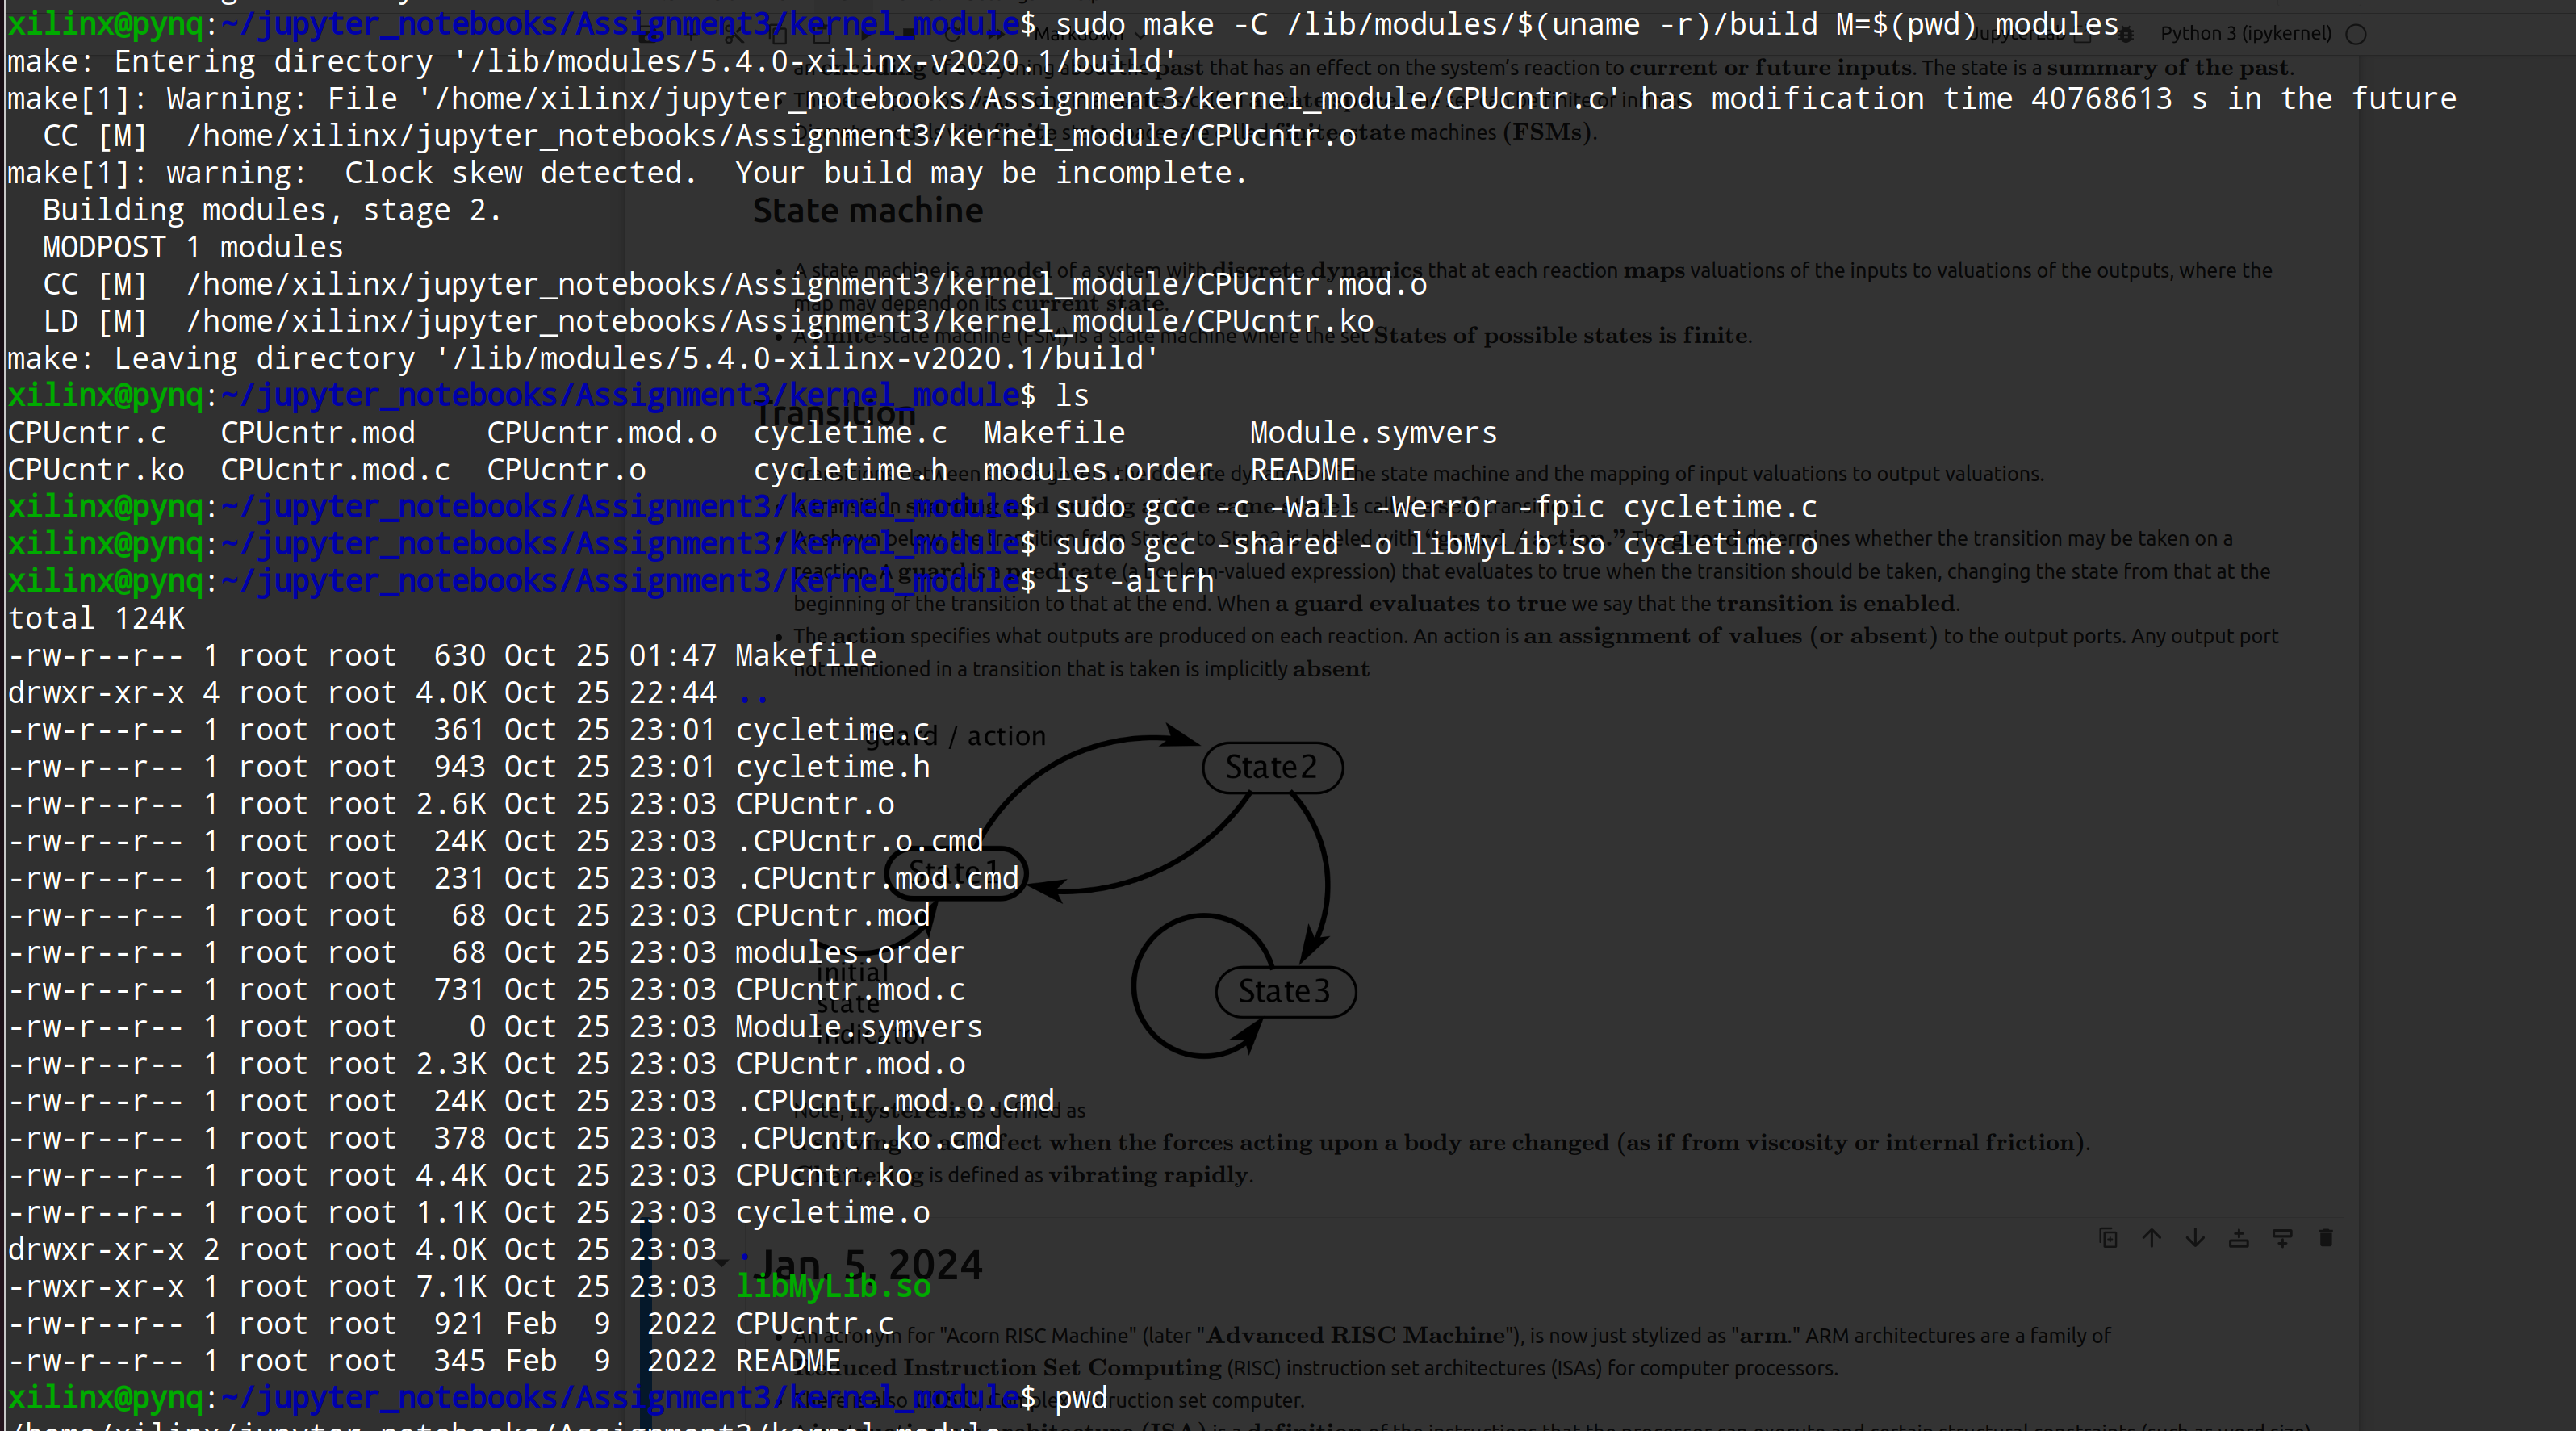

• Access the shared library functions using the ctypes module, but don’t wrap the function
calls in a python function.

In [1]:
import ctypes                                              # import ctypes interface for Python
import time
_libInC = ctypes.CDLL('./kernel_module/libMyLib.so')       # import our shared library

In [2]:
print(f"Get shared lib message {str(_libInC.getLibMessage())}.")

Get shared lib message 42.


In [3]:
reset, enable_divider = 1, 1
print(f"The sum of reset and enable_divider is {0}.\n",
      str(_libInC.setInitCounters(reset, enable_divider)))

ini = _libInC.getCycleCount()
print("Cycle count 1 is {0}.".format(str(ini)))

time.sleep(1)
end = _libInC.getCycleCount()
print("Cycle count 2 is {0}.".format(str(end)))
print("The difference between Cycle count 2 and Cycle count 1 is {0}.".
     format(str(end-ini)))

The sum of reset and enable_divider is 0.
 1
Cycle count 1 is 46625.
Cycle count 2 is 554045.
The difference between Cycle count 2 and Cycle count 1 is 507420.


# Part A3.2: Comparing and Gathering Data
In this section, we are going to use $\textbf{psutil}$ to monitor CPU usage in percent, and the time module and
PMU counting to evaluate the recursive fibonacci sequence timing operations. <br>

• Isolate CPU 1 by editing the bootargs (see lab work part 1) <br>
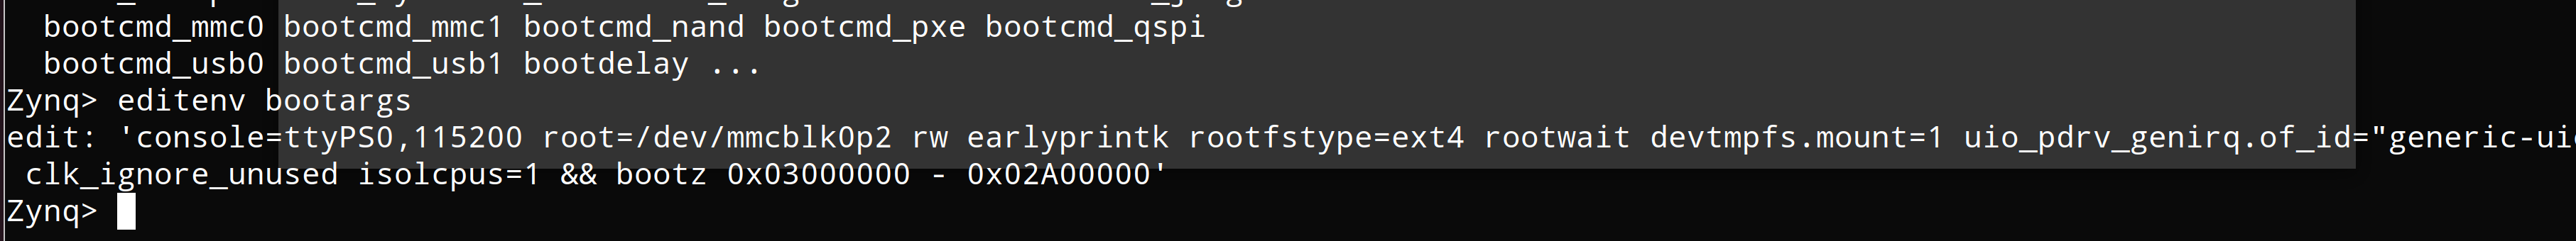

<font color='blue'> A trial run using Lab 2 indicates $\textbf{running solely on CPU 1}$ as follows.
</font>
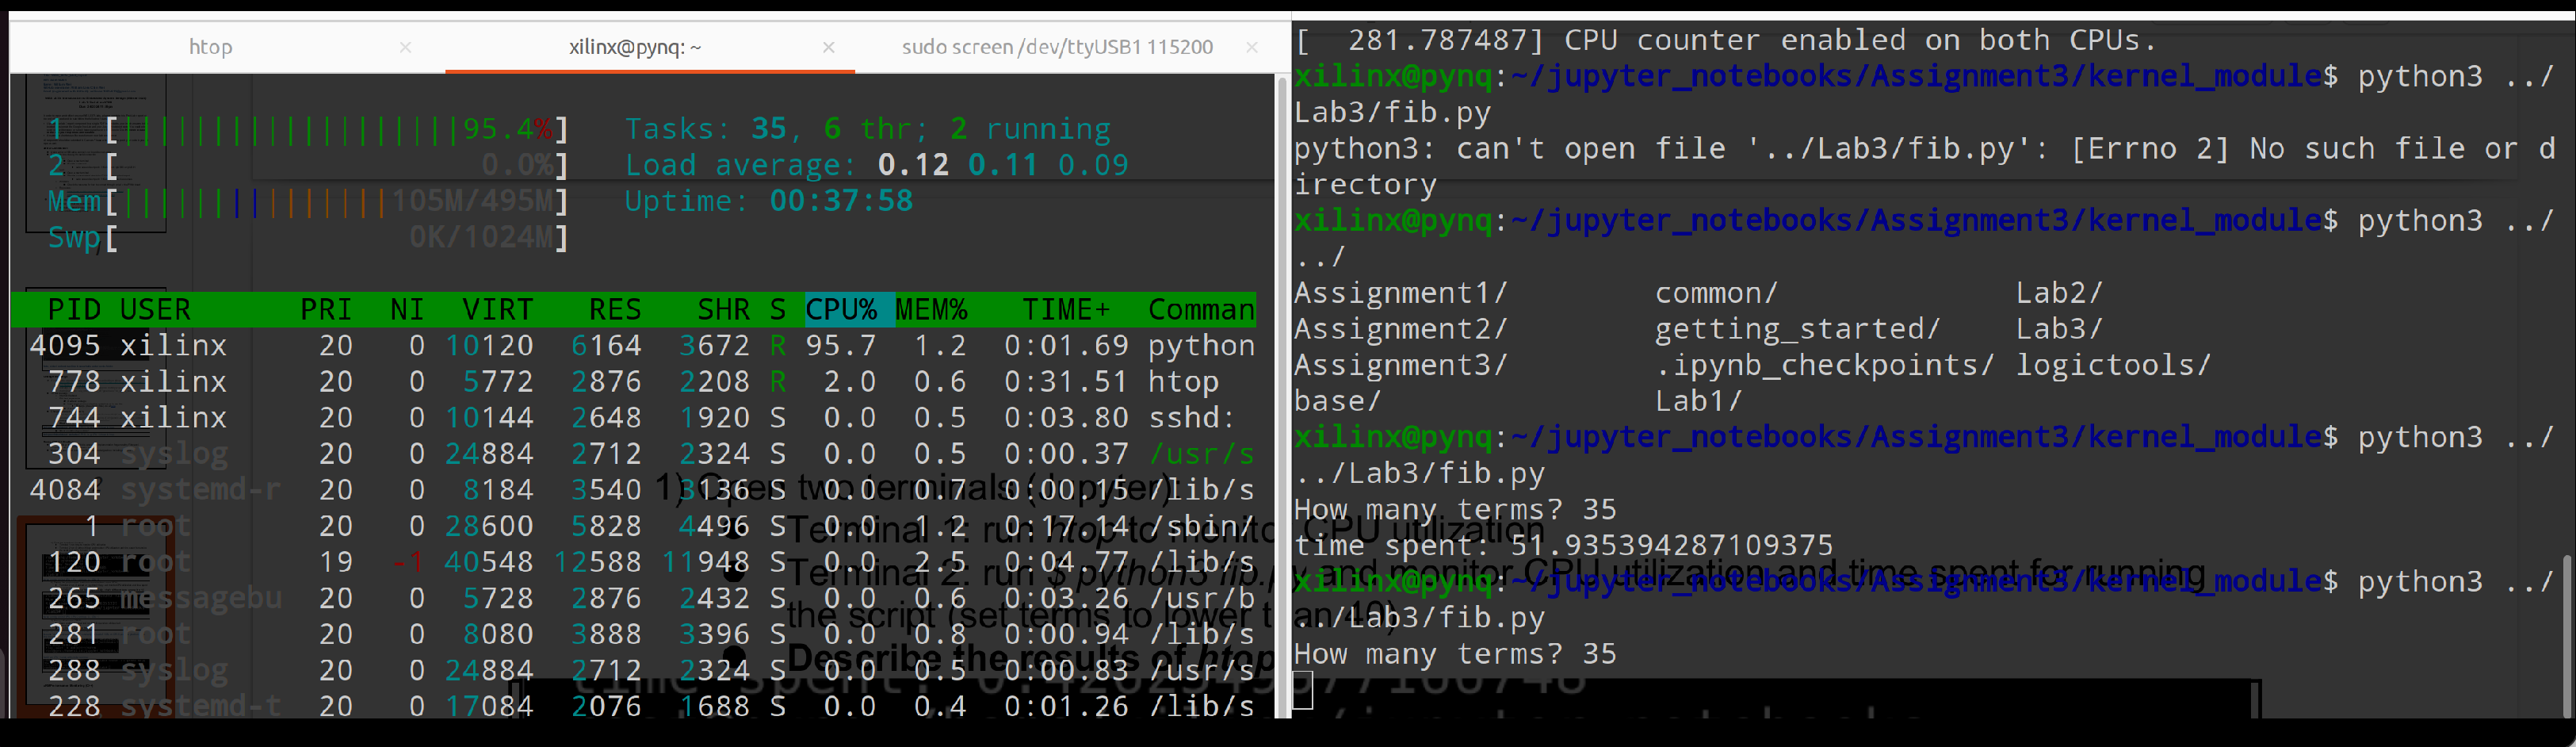

• Insert the CPUcntr kernel object onto both cpus using the instructions from lab <br>
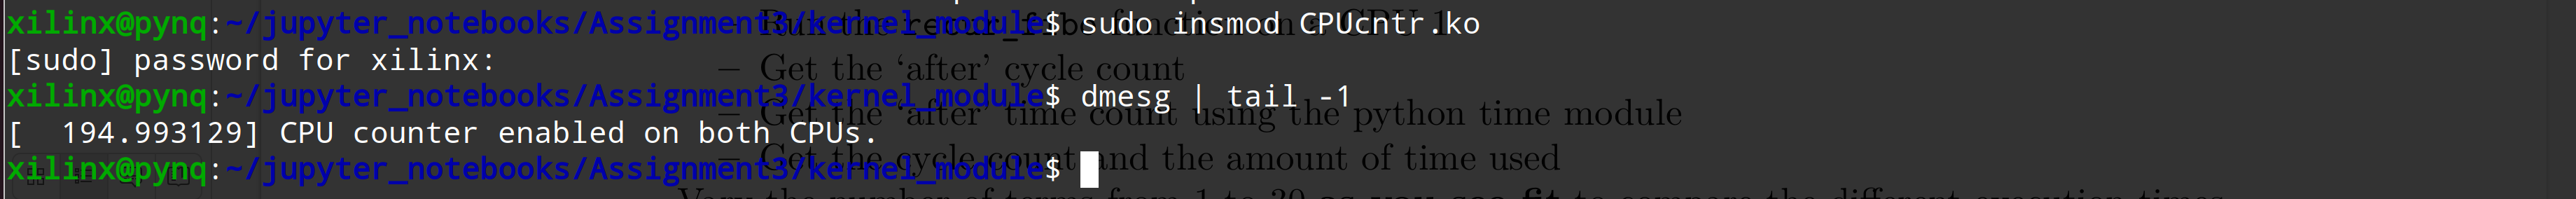

• Write code to do the following using the $\textbf{recur_fibo}$ function from lab
<font color='blue'> The $\textbf{recur_fibo}$ function is defined as follows.
</font>

In [4]:
def recur_fibo(n):
    if n <= 1:
        return n
    else:
        return(recur_fibo(n-1) + recur_fibo(n-2))

In [5]:
# unit test
n = 7
print('The answer of recur_fibo(n) of n={0} is {1}.\n'
      .format(n, recur_fibo(n)))

The answer of recur_fibo(n) of n=7 is 13.



– Initialize the cyclecounter <br>
– Get the ‘before’ time using the python time module <br>
– Get the ‘before’ cycle count <br>
– Run the recur_fibo function on a CPU 1 <br>
– Get the ‘after’ cycle count <br>
– Get the ‘after’ time count using the python time module
– Get the cycle count and the amount of time used

In [6]:
reset, enable_divider = 1, 1

def runTimedFibo(n, m=3):
    global count_list 
    # n: the number of terms
    # m: number of trials running recur_fibo
    
    for i in range(0, m):
        time.sleep(0.5)  # pause 0.5 second before each run
        print("================================Start of run {0}...".format(i))
        _libInC.setInitCounters(reset, enable_divider)              # Initialize the cyclecounter

        tic = time.time()                                           # Get the ‘before’ time using the python time module
        #print("The ‘before’ time is {0} sec.\n".format(str(tic)))  
        bCnt = _libInC.getCycleCount()                              # Get the ‘before’ cycle count
        #print("The ‘before’ cycle count is {0}.\n".format(str(bCnt)))    

        # Run the recur_fibo function on a CPU 1
        #n = 30
        print("Run {0}, running recur_fibo...".format(i))
        print('The answer of recur_fibo(n) of n={0} is {1}.'
              .format(n, recur_fibo(n)))                               

        aCnt = _libInC.getCycleCount()                              # Get the ‘after’ cycle count
        #print("The ‘after’ cycle count is {0}.\n".format(str(aCnt)))    
        tac = time.time()                                           # Get the ‘after’ time count using the python time module
        #print("The ‘after’ time is {0} sec.\n".format(str(tac)))

        # Get the cycle count and the amount of time used
        print("The the cycle count and the amount of time used are {0} and {1} sec.\n".
             format(str(aCnt - bCnt), str(tac - tic)))
        print("================================End of run {0}...\n".format(i))
        
        
        count_list.append((aCnt - bCnt))


In [7]:
n, m = 30, 3
count_list = []
runTimedFibo(n, m)

print('The cyclecounts for {1} are {0}.\n'.format(count_list, n))

from statistics import stdev
from statistics import mean
avg, stdev = round(mean(count_list), 1), round(stdev(count_list), 1)
print('The average and standard deviation for n = {2} are {0} and {1}.\n'.format(avg, stdev, n))

================================Start of run 0...
Run 0, running recur_fibo...
The answer of recur_fibo(n) of n=30 is 832040.
The the cycle count and the amount of time used are 46001021 and 4.529351711273193 sec.

================================End of run 0...

================================Start of run 1...
Run 1, running recur_fibo...
The answer of recur_fibo(n) of n=30 is 832040.
The the cycle count and the amount of time used are 50678834 and 4.9899375438690186 sec.

================================End of run 1...

================================Start of run 2...
Run 2, running recur_fibo...
The answer of recur_fibo(n) of n=30 is 832040.
The the cycle count and the amount of time used are 46004718 and 4.529715299606323 sec.

================================End of run 2...

The cyclecounts for 30 are [46001021, 50678834, 46004718].

The average and standard deviation for n = 30 are 47561524.3 and 2699670.0.



<font color='blue'> CPU usage from the case above is monitored using htop and indicates $\textbf{~82\%}$ when running n=30 on recur_fib as shown below.
</font>
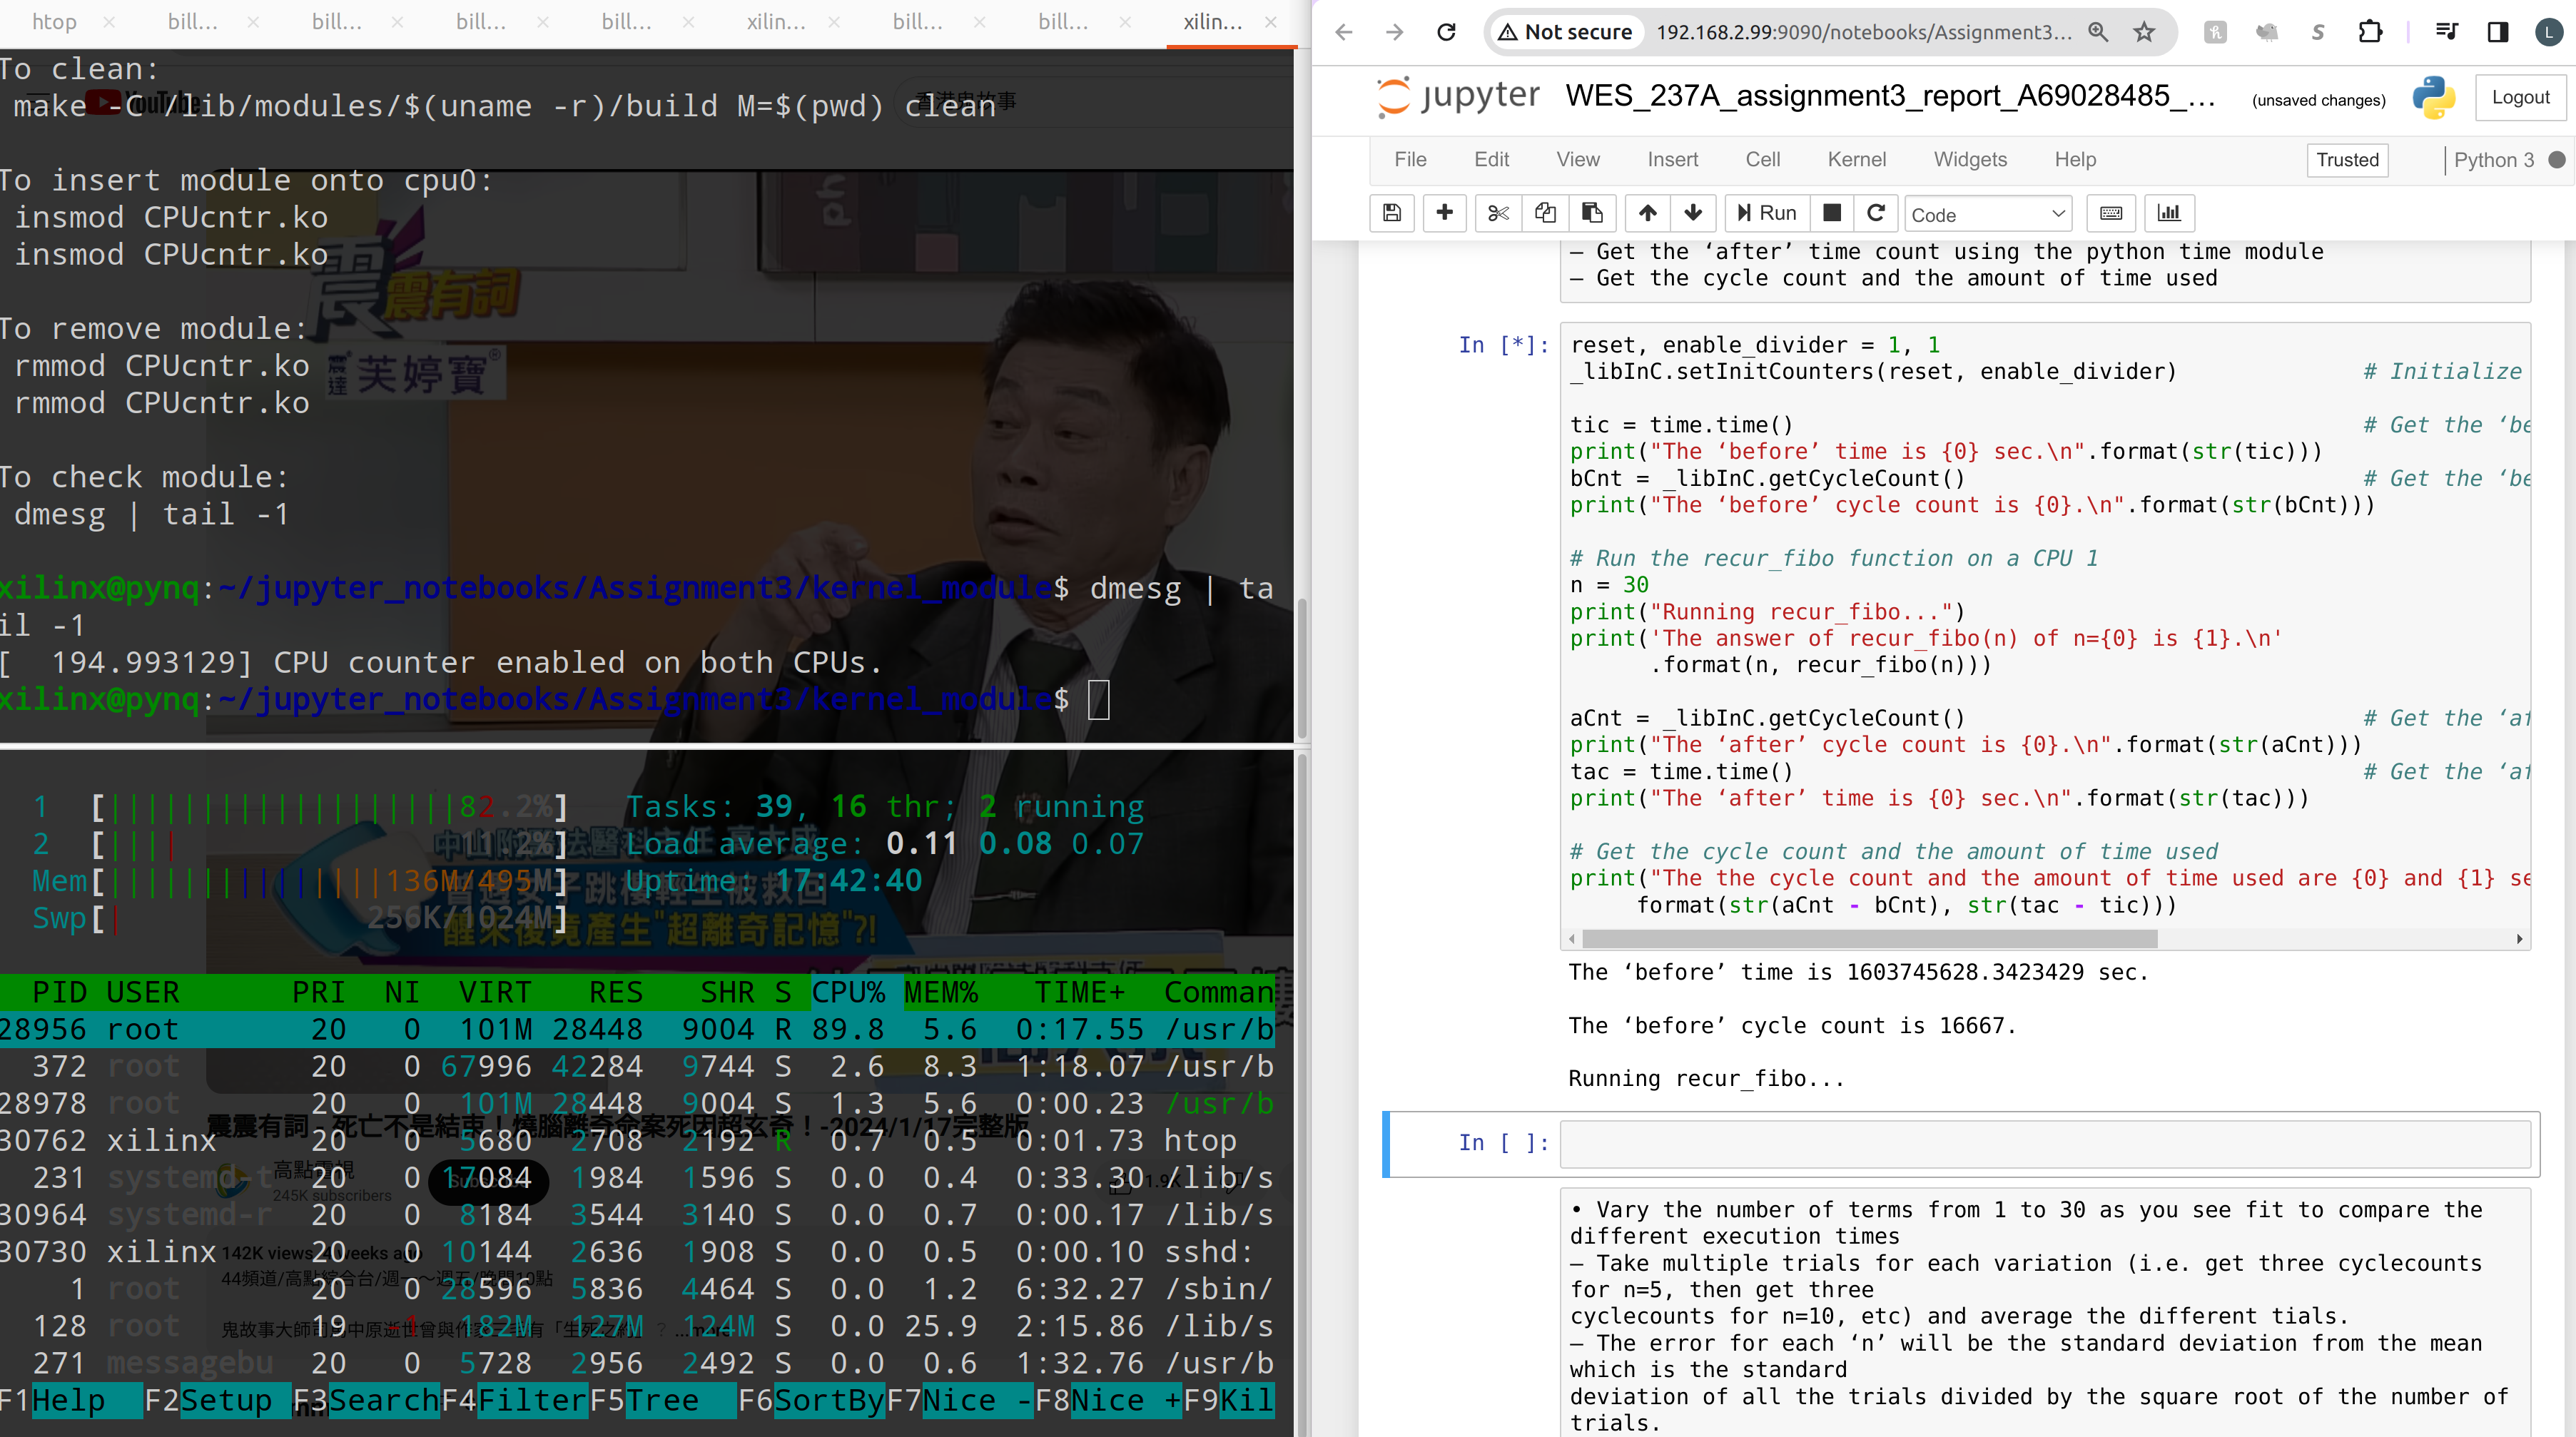

• Vary the number of terms $\textbf{n}$ from 1 to 30 as you see fit to compare the different execution times

– Take multiple trials for each variation (i.e. get three cyclecounts for n=5, then get three cyclecounts for n=10, etc) and average the different tials. <br>
<font color='blue'>
Here, I use variation for $\textbf{n = 5, 10, 15, 20, 25, and 30}$. In each n, there are $\textbf{m=20}$ trials. Statiscally, larger m yields smaller standard deviation based central limit theorem. 
</font> 

– The error for each ‘n’ will be the standard deviation from the mean which is the standard deviation of all the trials divided by the square root of the number of trials.<br>
<font color='blue'>
The descriptive statistics, i.e., mean and standard deviation, are estimated using \textbf{statistics} library.
</font> 


In [8]:
x, y, err = [], [], []
m = 20
for n in range(5, 31, 5):
    global x, y, err 
    count_list = []
    runTimedFibo(n, m)
    from statistics import stdev
    from statistics import mean
    avg, stdev = round(mean(count_list), 1), round(stdev(count_list), 1)
    x.append(n)
    y.append(avg)
    err.append(stdev)
    
print('The number of fibo in list ', x)
print('The cyclecount in list ', y)
print('The standard deviation in list', err)

================================Start of run 0...
Run 0, running recur_fibo...
The answer of recur_fibo(n) of n=5 is 5.
The the cycle count and the amount of time used are 4172 and 0.00042819976806640625 sec.

================================End of run 0...

================================Start of run 1...
Run 1, running recur_fibo...
The answer of recur_fibo(n) of n=5 is 5.
The the cycle count and the amount of time used are 4128 and 0.000423431396484375 sec.

================================End of run 1...

================================Start of run 2...
Run 2, running recur_fibo...
The answer of recur_fibo(n) of n=5 is 5.
The the cycle count and the amount of time used are 4109 and 0.00042128562927246094 sec.

================================End of run 2...

================================Start of run 3...
Run 3, running recur_fibo...
The answer of recur_fibo(n) of n=5 is 5.
The the cycle count and the amount of time used are 4111 and 0.0004210472106933594 sec.

================

================================Start of run 12...
Run 12, running recur_fibo...
The answer of recur_fibo(n) of n=10 is 55.
The the cycle count and the amount of time used are 6840 and 0.0006899833679199219 sec.

================================End of run 12...

================================Start of run 13...
Run 13, running recur_fibo...
The answer of recur_fibo(n) of n=10 is 55.
The the cycle count and the amount of time used are 6829 and 0.0006890296936035156 sec.

================================End of run 13...

================================Start of run 14...
Run 14, running recur_fibo...
The answer of recur_fibo(n) of n=10 is 55.
The the cycle count and the amount of time used are 6837 and 0.0006892681121826172 sec.

================================End of run 14...

================================Start of run 15...
Run 15, running recur_fibo...
The answer of recur_fibo(n) of n=10 is 55.
The the cycle count and the amount of time used are 6847 and 0.0006902217864990234 sec.

================================Start of run 4...
Run 4, running recur_fibo...
The answer of recur_fibo(n) of n=20 is 6765.
The the cycle count and the amount of time used are 408855 and 0.040276288986206055 sec.

================================End of run 4...

================================Start of run 5...
Run 5, running recur_fibo...
The answer of recur_fibo(n) of n=20 is 6765.
The the cycle count and the amount of time used are 408526 and 0.040244340896606445 sec.

================================End of run 5...

================================Start of run 6...
Run 6, running recur_fibo...
The answer of recur_fibo(n) of n=20 is 6765.
The the cycle count and the amount of time used are 448950 and 0.04422473907470703 sec.

================================End of run 6...

================================Start of run 7...
Run 7, running recur_fibo...
The answer of recur_fibo(n) of n=20 is 6765.
The the cycle count and the amount of time used are 406287 and 0.04002237319946289 sec.


The answer of recur_fibo(n) of n=25 is 75025.
The the cycle count and the amount of time used are 4292463 and 0.42266249656677246 sec.

================================End of run 15...

================================Start of run 16...
Run 16, running recur_fibo...
The answer of recur_fibo(n) of n=25 is 75025.
The the cycle count and the amount of time used are 4299084 and 0.42331457138061523 sec.

================================End of run 16...

================================Start of run 17...
Run 17, running recur_fibo...
The answer of recur_fibo(n) of n=25 is 75025.
The the cycle count and the amount of time used are 4542215 and 0.4472529888153076 sec.

================================End of run 17...

================================Start of run 18...
Run 18, running recur_fibo...
The answer of recur_fibo(n) of n=25 is 75025.
The the cycle count and the amount of time used are 4291693 and 0.42258644104003906 sec.

================================End of run 18...

==============

• Plot the average results for varying ‘n’ along with error bars of your measurments.
<font color='blue'>
The error bars plotted below utilize the values of standard deviation in list printed above.
</font> 
<br>
<font color='red'>
As shown below, there is a $\textbf{trade-off}$ using linear or log scale in y axis to make error bar visible.
For the later comparison, I found that $\textbf{linear scale provides better interpretation on data}$. Thus, the following figures are $\textbf{plotted in linear scale in y axis}$.
</font>

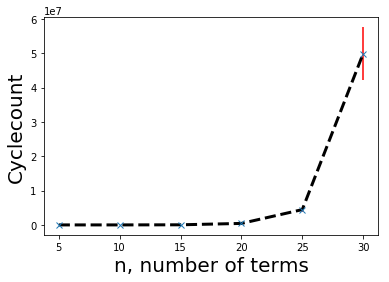

In [16]:
import matplotlib.pyplot as plt
# plotting graph in linear scale
plt.plot(x, y, 'k--', linewidth=3)
 
plt.errorbar(x, y,
             yerr = err,
             fmt ='x',
             ecolor = 'red')

plt.xlabel('n, number of terms', fontsize=20)
plt.ylabel('Cyclecount', fontsize=20)

plt.show(block=False)

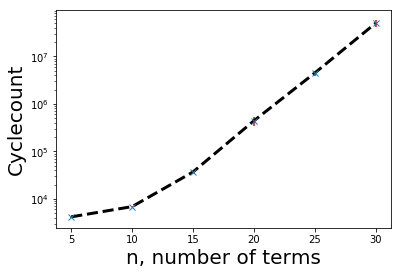

In [17]:
# plotting graph in log scale
plt.yscale("log")  
plt.plot(x, y, 'k--', linewidth=3)
 
plt.errorbar(x, y,
             yerr = err,
             fmt ='x',
             ecolor = 'red')

plt.xlabel('n, number of terms', fontsize=20)
plt.ylabel('Cyclecount', fontsize=20)

plt.show(block=False)

• In order to compare the timing module and PMU counting, we need them to be in the same
units.
– To get the CPU frequency, run cat /proc/cpuinfo in a new terminal or run lscpu
<font color='blue'>
Note, CPU frequency, also known as clock speed, is the $\textbf{number of cycles a CPU can execute per second}$. It is measured in hertz (Hz).
</font>

<font color='blue'>
As shown below, the BogoMIPS runs at $\textbf{650 Hz}$, i.e., CPU frequency. 
Note, MIPS stands for $\textbf{"Millions of Instructions Per Second}$," which is a legitimate performance metric.
</font>
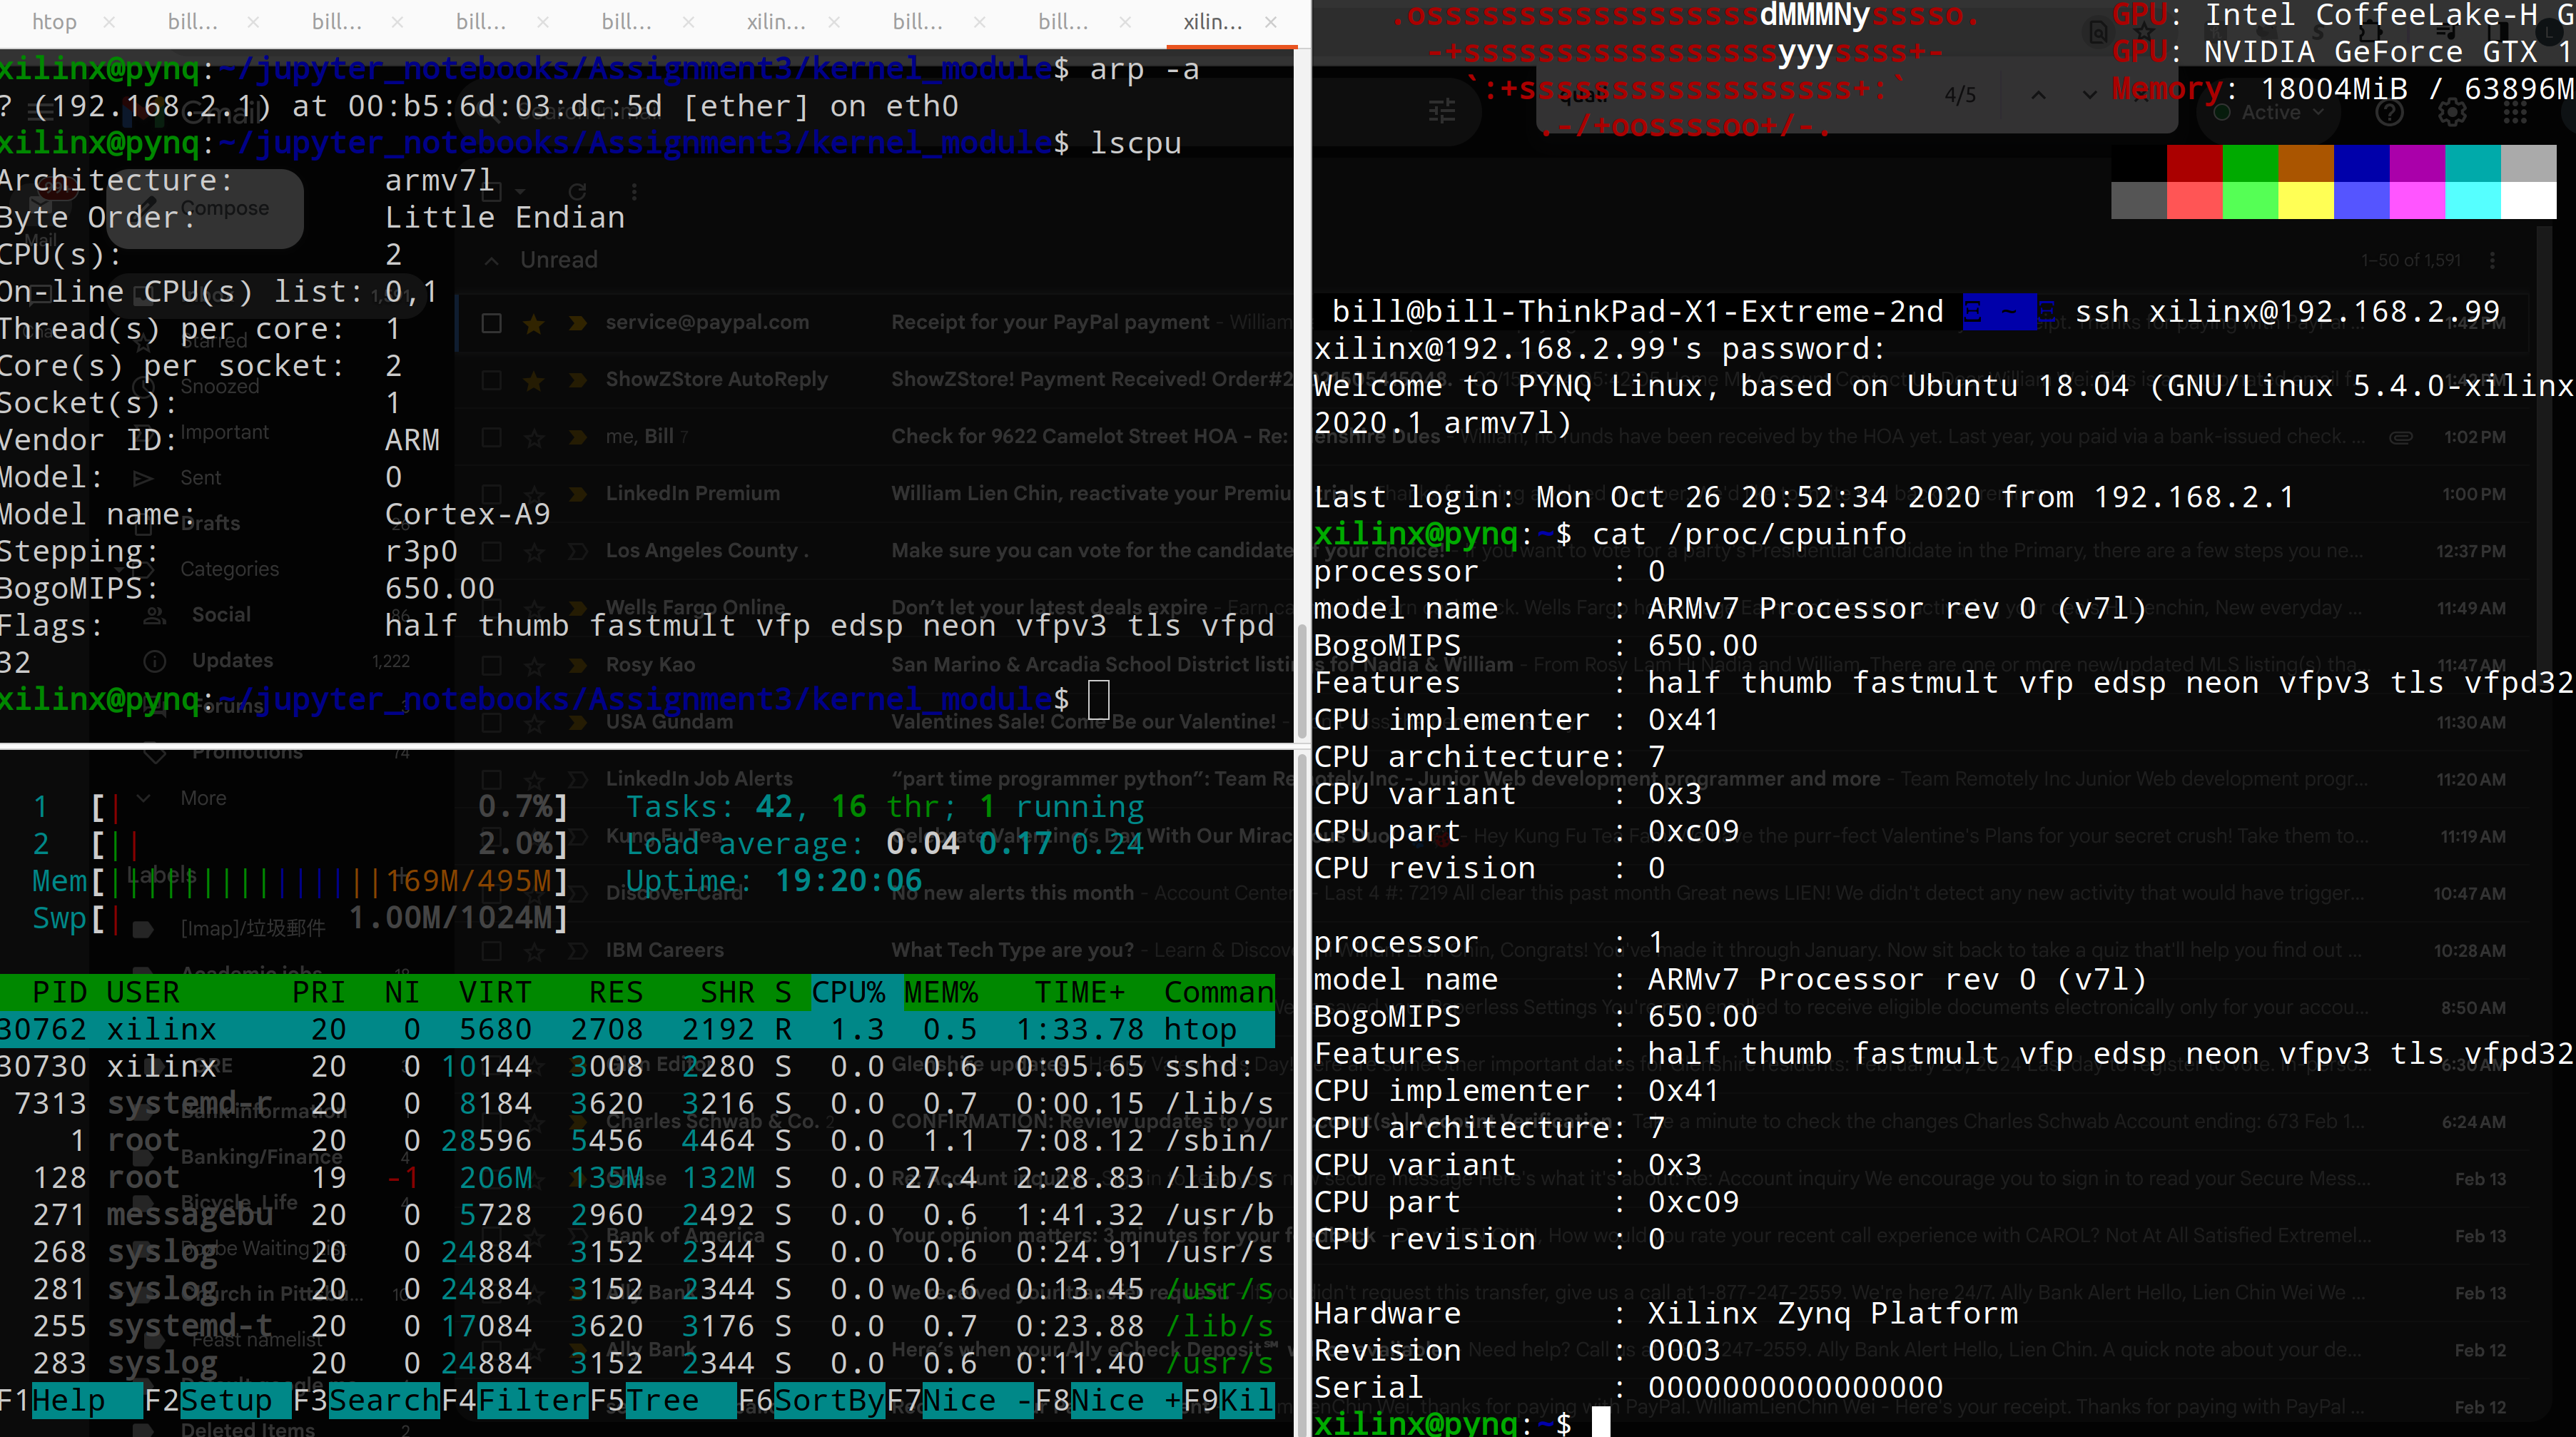

– Use this frequency to convert the PMU output from clock counts to timing
<font color='blue'>
The PMU output using cyclecount divided by 650 Hz yields timing plot as shown below.
</font>

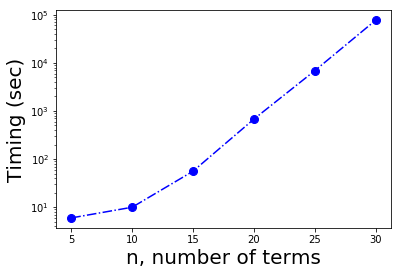

In [20]:
freq = 650
timing = [divmod(x, freq)[0] for x in y]

# plotting graph
plt.yscale("log")  
plt.plot(x, timing, 'b-.',marker = 'o', ms = 8)

plt.xlabel('n, number of terms', fontsize=20)
plt.ylabel('Timing (sec)', fontsize=20)

plt.show(block=False)

– Compare the timing of the PMU counter to the timing module <br>
<font color='blue'>

The comparison of timing of the PMU indicates a qualitative agreement between timing and complexity. <br>
However, the change of $\textbf{slope}$ of complexity is larger for smaller n, e.g., n=[5, 25], while, for larger n=[25, 30], the change of $\textbf{slope}$ of timing is larger. In other words, the timing increases dramatically when n > 25. <br>
The comparison utilizes $\textbf{normalization}$ of cyclecounts, timing, and complexity. Note, Fibo function has a $\textbf{time complexity O(n^2)}$. <br> 
</font>

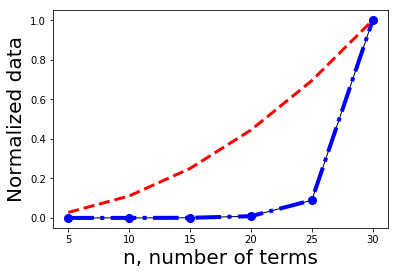

In [34]:
nC = [i/max(y) for i in y]
nT = [i/max(timing) for i in timing]
nN = [(i/max(x))**2 for i in x]
#print(nC, nT, nN)

plt.plot(x, nC, 'k-', linewidth=1, label='Normalized count')
plt.plot(x, nT, 'b-.',marker = 'o', ms = 8, linewidth=4, label='Normalized timing')
plt.plot(x, nN, 'r--', linewidth=3, label='Normalized complexity')

plt.xlabel('n, number of terms', fontsize=20)
plt.ylabel('Normalized data', fontsize=20)

plt.show(block=False)